<div style="background-color:#783465 ; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:white"> OpenAI API</h1>
    
<h4 style="color:black"> Datalab V: Julia Boschman, Isa Dijkstra, Daan Eising, Rogier Gernaat </h4>

<a name='start'></a>

In [5]:
# pip install openai
!pip install --upgrade openai



[Back to the top](#start)
<a name='5.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H1: Opzetten van de omgeving</strong></h2>
</div>

## Introductie

In dit project bouwen we een eigen AI-chatbot die via de OpenAI API werkt. Deze aanpak verschilt van het gebruik van een Custom GPT binnen ChatGPT: er zijn meer technische stappen, maar ook veel meer controle over de werking, prompts, context, kosten en integratiemogelijkheden.

## Uitleg van de class `OpenAIChatbot`

- **API-key beveiliging:**  
  De API-key wordt niet hardcoded, maar moet door de gebruiker via de terminal (`input()`) worden ingevoerd. Dit is veilig, zodat er geen sleutels op GitHub of elders kunnen lekken.

- **Extern system prompt-bestand:**  
  In plaats van een prompt in de code, staat de volledige system prompt in een apart tekstbestand (`system-prompts.txt`). Hierdoor is de instructie makkelijk aan te passen en kan dezelfde set regels gebruikt worden als in een Custom GPT. Zo waarborg je consistent gedrag van je chatbot.

- **Modelinstelling:**  
  De chatbot maakt gebruik van het `"gpt-4o"` model, maar dit is eenvoudig aanpasbaar naar andere modellen als we dat willen testen.

- **Chatgeschiedenis:**  
  Alle berichten (zowel van de gebruiker als de AI) worden opgeslagen in de variabele `history`, zodat de context in stand blijft. Dit is belangrijk voor coherente, contextgevoelige antwoorden.

- **Kostenberekening:**  
  Na elke beurt worden de kosten berekend op basis van het aantal input- en outputtokens, volgens de actuele OpenAI-prijzen. Zo krijg je inzicht in het verbruik en de kosten van je sessie. Aan het eind van het gesprek wordt het totaal getoond.

## Belangrijke aandachtspunten

- **Kennisbestanden toevoegen:**  
  In tegenstelling tot Custom GPT kun je in deze basisopzet niet direct kennisbestanden 'uploaden' waar het model uit zichzelf toegang toe heeft. Later in het project kun je document parsing en retrieval-functionaliteit toevoegen, waarbij je relevante passages uit je kennisbank als context meegeeft in je prompt.

- **Verbeterpunten en uitbreidingen:**  
  Mogelijke verbeteringen zijn onder andere het toevoegen van kennis via retrieval (RAG), het uitbreiden met een webinterface, het automatisch opslaan van gesprekken, en het verbeteren van kostenmanagement. Deze uitbreidingen kunnen stap voor stap in het notebook worden verwerkt.

- **Bewustwording van kosten:**  
  Door de kostenberekening direct inzichtelijk te maken, ben je je als gebruiker bewust van het daadwerkelijke verbruik en de kosten die horen bij een voorbeeldsessie of test.




In [ ]:
class OpenAIChatbot:
    def __init__(self):
        import openai
        self.api_key = input("Voer je OpenAI API key in: ").strip()
        self.client = openai.OpenAI(api_key=self.api_key)
        self.model = "gpt-4o"
        self.history = [self._get_system_prompt()]
        self.total_cost = 0.0  # In USD

    def _get_system_prompt(self):
        with open("system-prompts.txt", encoding="utf-8") as f:
            system_prompt = f.read()
        return {
            "role": "system",
            "content": system_prompt
        }

    def _calculate_cost(self, response):
        # Huidige prijzen mei 2025 (bron: https://openai.com/api/pricing)
        # $5 per 1M input tokens, $15 per 1M output tokens (gpt-4o)
        usage = response.usage
        input_tokens = usage.prompt_tokens
        output_tokens = usage.completion_tokens
        input_cost = (input_tokens / 1_000_000) * 5
        output_cost = (output_tokens / 1_000_000) * 15
        total = input_cost + output_cost
        return total

    def chat(self):
        print("Typ 'stop' om te stoppen.")
        while True:
            user_input = input("\nGebruiker: ")
            if user_input.lower() == 'stop':
                print("\nGesprek beëindigd.")
                break
            self.history.append({"role": "user", "content": user_input})

            response = self.client.chat.completions.create(
                model=self.model,
                messages=self.history,
                max_tokens=500  # Dit kunnen we misschien nog ophogen maar ik ga nog niet intensief testen
            )
            answer = response.choices[0].message.content
            print(f"Kennisnet AI: {answer}")
            self.history.append({"role": "assistant", "content": answer})

            # Kosten optellen
            cost = self._calculate_cost(response)
            self.total_cost += cost

        print(f"\nTotale kosten van deze chat: ${self.total_cost:.6f} USD")

if __name__ == "__main__":
    bot = OpenAIChatbot()
    bot.chat()


Typ 'stop' om te stoppen.
AI: Hallo! Mijn doel is om te helpen bij het opstellen of verbeteren van een leermiddelenbeleid voor scholen. Samen doorlopen we verschillende hoofdstukken waarin we belangrijke vragen beantwoorden met als einddoel een gedetailleerd en werkend leermiddelenbeleid. Het proces duurt ongeveer 1 á 2 uur. Als je al een bestaand leermiddelenbeleid hebt dat je wilt verbeteren, kan ik je daar ook bij assisteren. Laat me weten hoe ik kan helpen!

Gesprek beëindigd.

Totale kosten van deze chat: $0.007870 USD


[Back to the top](#start)
<a name='5.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H2: Testen van de omgeving</strong></h2>
</div>

Hier kunnen we een aantal testjes doen, misschien zelfs een gedeelte genereren en kijken of het overeenkomt of misschien zelfs beter is dan de custom  GPT

Hier kunnen we dus kijken of hij zonder de knowlegde bestanden die de customgpt een beetje op een soortgelijk resultaat komt en hoe erg het dus eigenlijk van belang is sinds het custom gptje wel gebruik maakt van bestanden zoals "voorbeeld LMB" waar de structuur in staat die hij moet vasthouden en de vragen die hierbij horen. 

Na het testen zullen we er dan ook vast achter komen of er meer system prompts moeten worden toegevoegd en of er enige regels zijn die niet goed of misschien minder goed werken met de openAI API

[Back to the top](#start)
<a name='5.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H4: Externe kennis toevoegen aan je chatbot</strong></h2>
</div>


Een groot voordeel van de Custom GPTs die wij hebben is dat je eenvoudig documenten ("knowledge files") kunt uploaden die automatisch in de kennisbank van de chatbot worden meegenomen. Hierdoor kan het model direct relevante informatie uit deze bestanden halen tijdens een gesprek, zonder dat je handmatig context hoeft toe te voegen.

Bij gebruik van de **OpenAI API** is deze functionaliteit niet standaard aanwezig: je kunt geen bestanden "uploaden" zodat het model er zelfstandig uit leest. Je zult dus **zelf een mechanisme moeten bouwen** waarmee je kennisbestanden doorzoekbaar maakt en relevante context toevoegt aan de prompts. Dit proces wordt in de AI-wereld vaak aangeduid als "Retrieval-Augmented Generation" (RAG), maar er zijn ook alternatieven.

---

## Mogelijke methoden om externe kennis toe te voegen

### 1. Retrieval-Augmented Generation (RAG)

**Wat is RAG?**  
RAG combineert een grote taalmodel (zoals GPT-4o) met een eigen kennisbank. Als een gebruiker een vraag stelt, zoekt je applicatie automatisch relevante passages op in jouw documenten en voegt deze toe als context aan de prompt voor het LLM. Zo lijkt het alsof het model “weet” wat er in je kennisbank staat, zonder dat je het model zelf hoeft te trainen.

**Stappen in het kort:**
- Splits je documenten op in kleine tekststukken (bijv. paragrafen).
- Maak van deze stukken "embeddings" (vectorrepresentaties van betekenis) en sla ze op in een vector database (zoals ChromaDB, Pinecone, FAISS).
- Wanneer de gebruiker een vraag stelt, zoek je via embeddings de meest relevante tekststukken.
- Voeg deze tekst toe aan de prompt voordat je het model aanroept.

**Voordelen:**  
- Zeer schaalbaar en flexibel.
- Werkt direct met nieuwe of aangepaste documenten.
- Snel te implementeren met bestaande tools.

**Nadelen:**  
- Vereist extra infrastructuur (embeddings maken, database draaien).
- Soms is prompt-engineering nodig om hallucinerende of irrelevante antwoorden te voorkomen.

Zie ook:  
- [OpenAI Cookbook: Retrieval Augmented Generation (RAG)](https://github.com/openai/openai-cookbook/tree/main/examples)
- [ChromaDB Documentation](https://docs.trychroma.com/)

---

### 2. Simpele context-injectie (keyword search)

**Wat houdt dit in?**  
Bij een eenvoudige implementatie kun je bij elke gebruikersvraag met een gewone tekst- of keyword search relevante passages zoeken in je kennisbestanden, en deze als extra context meesturen in de prompt.

**Stappen:**
- Lees je documenten in en splits ze op.
- Zoek op basis van zoektermen of regex naar relevante stukken tekst.
- Voeg de meest relevante tekst direct toe aan je prompt.

**Voordelen:**  
- Snel op te zetten, geen database nodig.
- Werkt voor kleine kennisbanken.

**Nadelen:**  
- Minder "slim" dan semantisch zoeken (zoals RAG).
- Slechtere resultaten bij complexe of vage vragen.
- Minder schaalbaar bij grote kennisbanken.

---

### 3. Preprocessing (antwoord templates / Q&A index)

**Wat houdt dit in?**  
Je maakt handmatig een set met veelgestelde vragen (FAQ) of templates, waarbij je per mogelijke gebruikersvraag een standaardantwoord (inclusief kennis uit je documenten) toevoegt. Je chatbot vergelijkt elke nieuwe vraag met deze index (via keyword match of simpele similarity score) en gebruikt het best passende antwoord.

**Voordelen:**  
- Snel en robuust voor voorspelbare, veelvoorkomende vragen.
- Geen complexe infrastructuur nodig.

**Nadelen:**  
- Geen flexibiliteit voor nieuwe, onverwachte vragen.
- Veel onderhoud bij grote of dynamische kennisbanken.

---

## Wanneer kies je welke methode?

| Methode          | Voordelen                                  | Nadelen                                     | Aanbevolen bij         |
|------------------|--------------------------------------------|---------------------------------------------|------------------------|
| **RAG**          | Zeer flexibel, schaalbaar, contextueel     | Complexer, embeddings & database nodig      | Grote/dynamische kennis|
| **Keyword search**| Simpel, snel op te zetten                  | Minder accuraat, weinig contextbegrip       | Kleine/vaste kennisbank|
| **Preprocessing**| Snel, onderhoudbaar voor kleine FAQ’s      | Niet flexibel, arbeidsintensief bij groei   | Statische FAQ/chatbots |

---

## Samenvatting

Hoewel Custom GPTs automatisch kennisbestanden als context meenemen, moet je bij gebruik van de OpenAI API **zelf een retrieval-mechanisme bouwen**. De meest gebruikte en flexibele aanpak is RAG, waarbij je bij elke vraag relevante kennis dynamisch toevoegt aan de prompt. Voor kleinere toepassingen zijn keyword search of een handgemaakte FAQ-index vaak al voldoende.

**Bronnen:**
- [OpenAI Cookbook: Retrieval Augmented Generation (RAG)](https://github.com/openai/openai-cookbook/blob/main/examples/Retrieval_Augmented_Generation_with_OpenAI.ipynb)
- [OpenAI Platform Docs](https://platform.openai.com/docs/guides/)
- [ChromaDB](https://www.trychroma.com/)
- [Pinecone](https://www.pinecone.io/)

---


[Back to the top](#start)
<a name='5.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H4: Fine tuning?</strong></h2>
</div>

Ik heb mezelf hier nog niet heel erg in verdiept maar dit zijn aangeraden richtingen die ik zowel krijg van chatje en die ik zie op het internet

#### **Wat kun je bereiken met fine-tuning?**

- **Consistente stijl & structuur:** Het model volgt jouw formats en tone-of-voice (ook bij korte prompts).

- **Specialistische kennis:** Je kunt veel domeinkennis inbouwen (bijv. onderwijsbeleid, specifieke regelgeving).

- **Unieke interactiestijl:** Je bepaalt hoe vragen gesteld worden, hoe antwoorden opgebouwd zijn, etc.

- **Standaardantwoorden & policies:** Model leert specifieke antwoorden op herhaalde vragen (bijv. over beleid, veelgestelde vragen).

finetunen kan op dit moment wel alleen met het model *GPT 3.5 turbo* blijkbaar (misschien dit nog dubbelchecken voor de zekerheid)

Instructies lijken mij niet al te ingewikkeld maar dan moeten we nog ff samen bespreken wat en hoe we precies willen finetunene : https://platform.openai.com/docs/guides/fine-tuning

[Back to the top](#start)
<a name='5.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H5: Front-end (Optioneel)</strong></h2>
</div>

Heb ik er voor nu alleen even ingevoegd omdat ik het zelf erg leuk zou vinden om een simpele frontend te hebben. Lijkt me ook chiller om in te testen zelf. Werkt tot nu toe eigenlijk echt al heel goed (sneller dan ik had verwacht en de output is ook zeker niet verkeerd. Kosten worden ook weergeven )

In [12]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


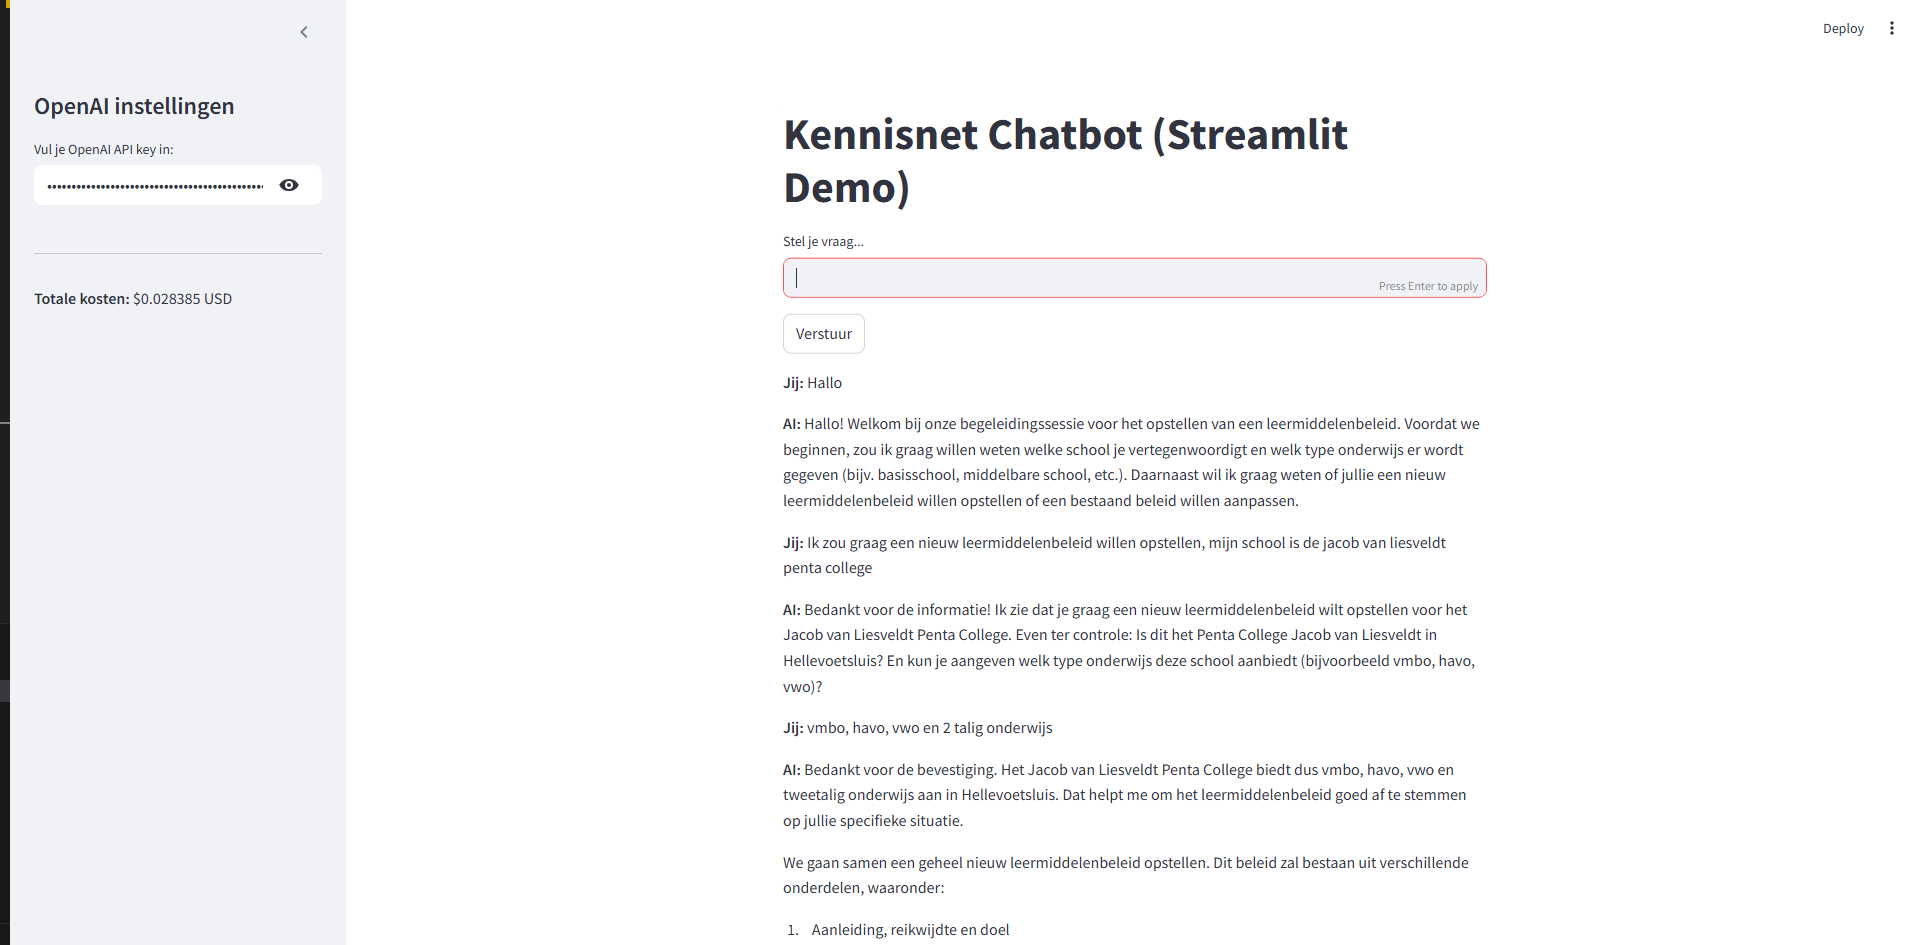

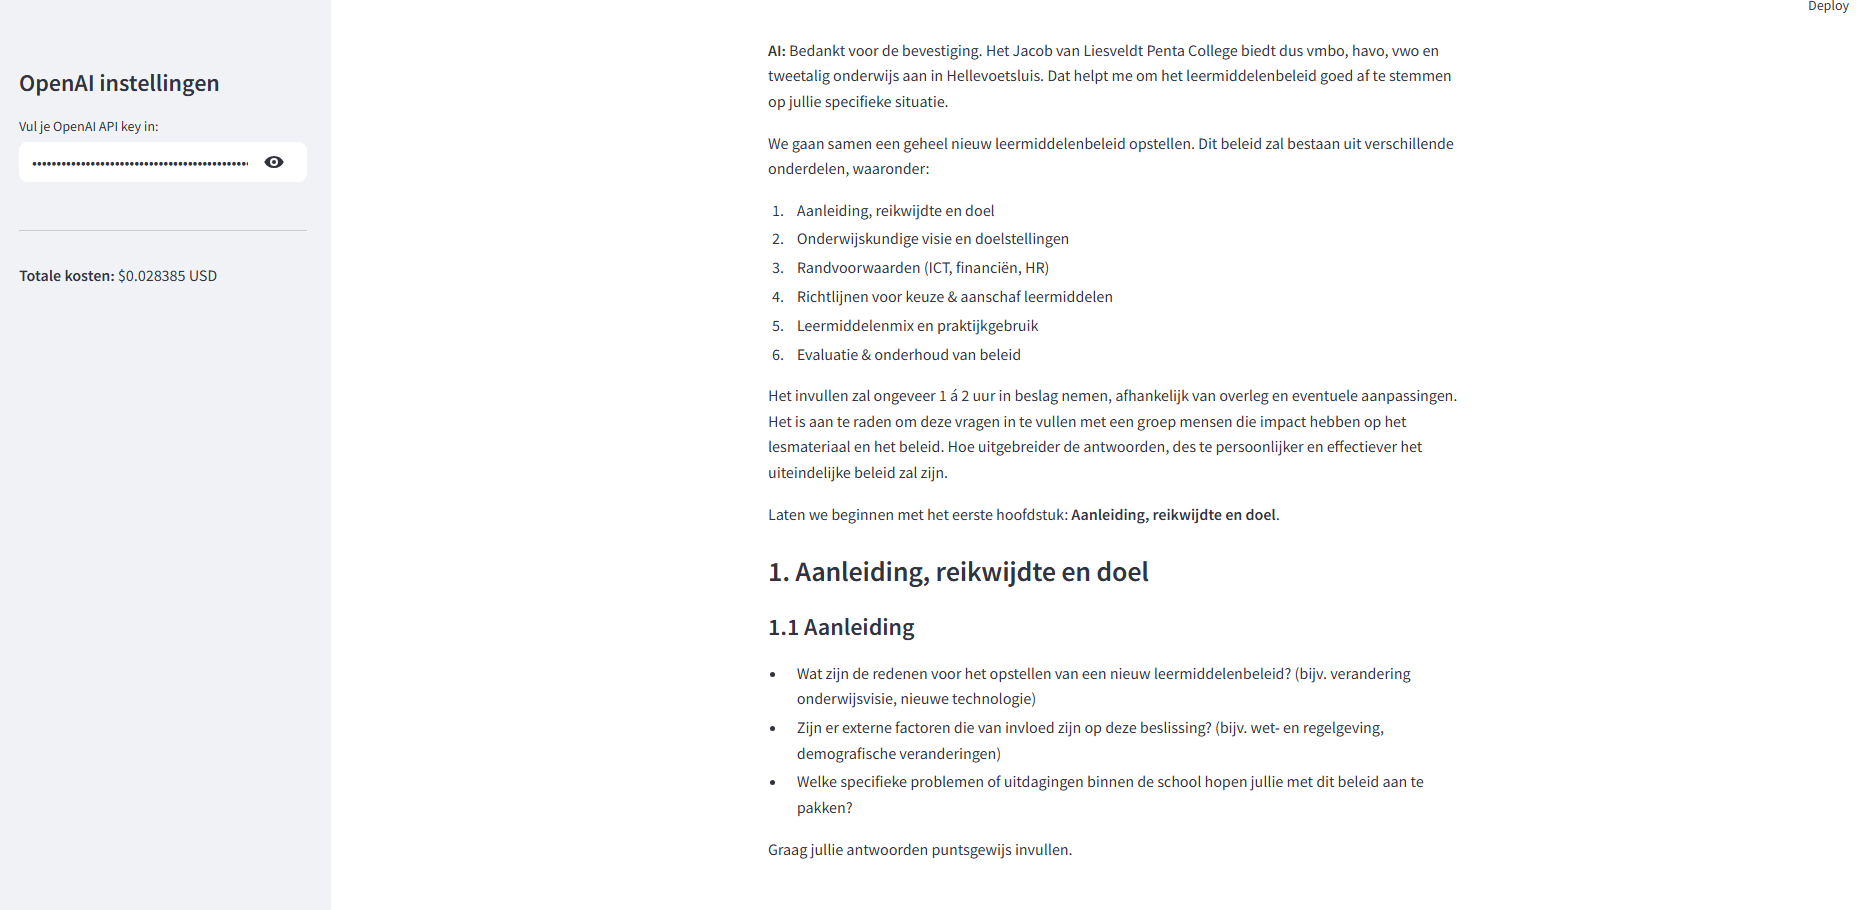

ook zoals je in deze test kunt zien neemt dus de chatbot de volgorde wel heel goed aan en weet hij wat hij moet doen en hij neemt de system prompts heel goed mee tot nu toe die we ook gemakkelijk kunnen aanpassen

Nadeel nu vooral is is dat je gelijk in het eerste stuk al kunt zien dat hij de informatie nu niet tot zijn beschikking heeft, aanleiding in de "Format vragen" bijvoorbeeld bestaat uit: 

### **Aanleiding, reikwijdte en doel** 

**1.1 Aanleiding**  

- Wat is de directe aanleiding voor het opstellen van een (nieuw) leermiddelenbeleid? Bijvoorbeeld strategische doelen, evaluatie huidige middelen, opbrengsten (interne factoren). 

- Zijn er wettelijke of aanbestedingseisen die om een (vernieuwd) leermiddelenbeleid vragen? Bijvoorbeeld aanbestedingsplicht, nieuwe onderwijstrends of veranderd curriculum (externe factoren). 

Wat nu natuurlijk niet overeenkomt met wat de chatbot terug stuurt

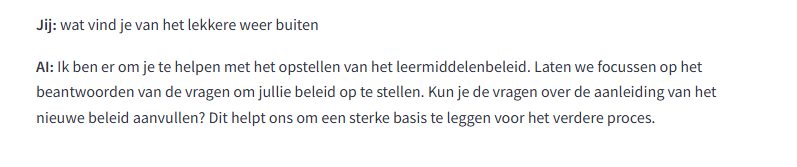

hij neemt wel nette stukken alsnog mee als het niet hallucineren of informatie dienen over andere onderwerpen wat aanduid dat we als "Grote" probleem hebben dat we dus echt een soort knowledge moeten gaan koppelen aan de chatbot om hem een beetje soort gelijk te gaan maken aan de custom gpt. Daarnaast is ons ook gevraagd om te finetunen natuurlijk maar dat moet goedkomen

Heb ook de UI nog iets verbeterd: 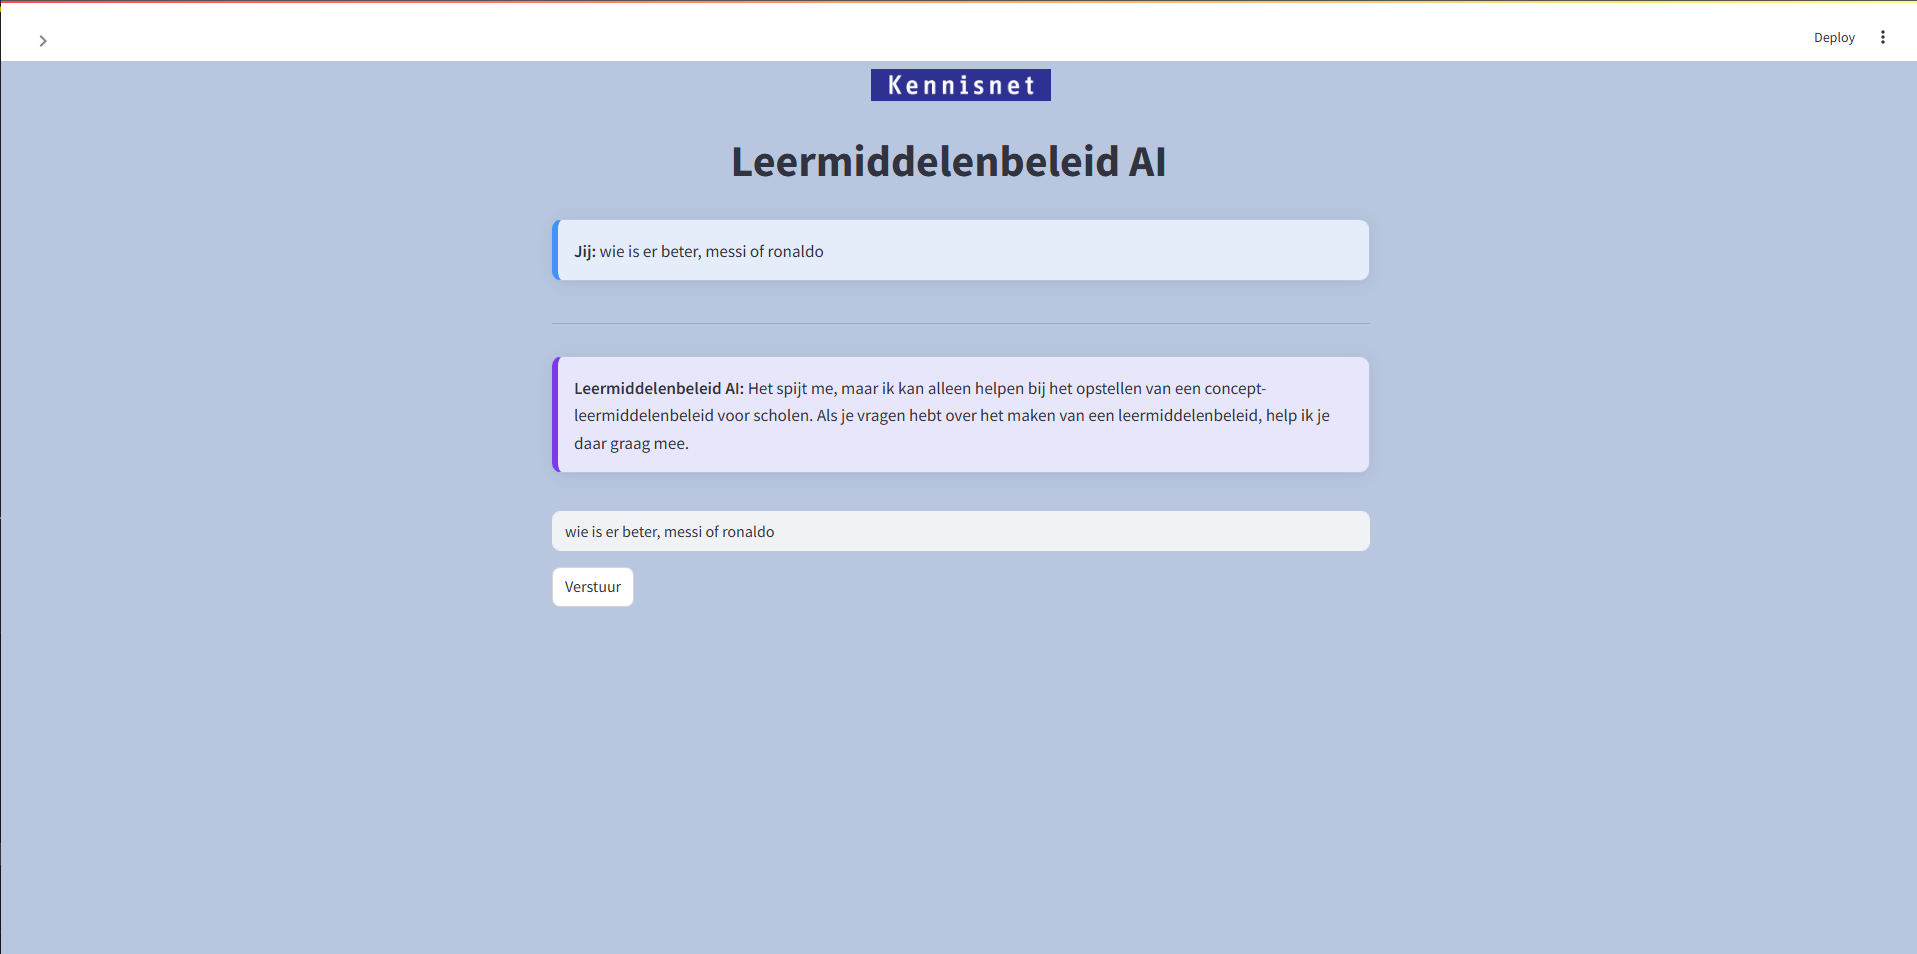

Notebook word uiteraard nog netter